# EXPLORATORY DATA ANALYSIS ON SUPERMARKET SALES 🛒


### Introduction


In today’s competitive retail environment, an in-depth understanding of sales data is vital for informed business decisions. This report evaluates the sales performance of a supermarket company, addressing various objectives - from identifying the most performing branch to assessing popular products and examining customer satisfaction. The aim is to gain insights on the overall performance of the supermarket.
The dataset includes historical sales data covering a three-month period (January to March 2019) from three branches of the supermarket company located in different cities namely:
1.	Yangon (Branch A)
2.	Mandalay (Branch B)
3.	Naypyitaw (Branch C)


#### Import Dataset and Libraries

In [1]:
#Import the libraries 

#dataframe and numerical libraries
import pandas as pd     
import numpy as np    

#geolocalisation
import folium

#vizualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#vizualization of NaN values
import missingno as msno


In [2]:
#import dataset
df = pd.read_csv('supermarket_sales.csv', low_memory=False)


In [3]:
df.head(10).style.background_gradient(axis=0)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,3/25/2019,18:30,Ewallet,597.730000,4.761905,29.886500,4.100000
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2/25/2019,14:36,Ewallet,413.040000,4.761905,20.652000,5.800000
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2/24/2019,11:38,Ewallet,735.600000,4.761905,36.780000,8.000000
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,1/10/2019,17:15,Credit card,72.520000,4.761905,3.626000,7.200000
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2/20/2019,13:27,Credit card,164.520000,4.761905,8.226000,5.900000


In [4]:
shape=df.shape
print(f'The dataset contains {shape[0]} rows and {shape[1]} columns')

The dataset contains 1000 rows and 17 columns


### DATA PRE-PROCESSING 



In [5]:
#check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#convert the date and time columns into datetime dtypes
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

In [7]:
df['Day'] = df['Date'].dt.day_name()

In [8]:
df['Month']=df['Date'].dt.month

In [9]:
df['Hour'] = (df['Time']).dt.hour

In [10]:
#set date as index of the dataset
df.set_index('Date', inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
Date,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2023-12-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,13
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2023-12-05 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,10
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2023-12-05 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,13
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2023-12-05 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,20
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2023-12-05 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,10


In [11]:
df.describe().style.background_gradient(axis=None)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905,15.379369,6.972700,1.993000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580,0.835254,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.500000,1.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.000000,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000,3.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000,3.000000,20.000000


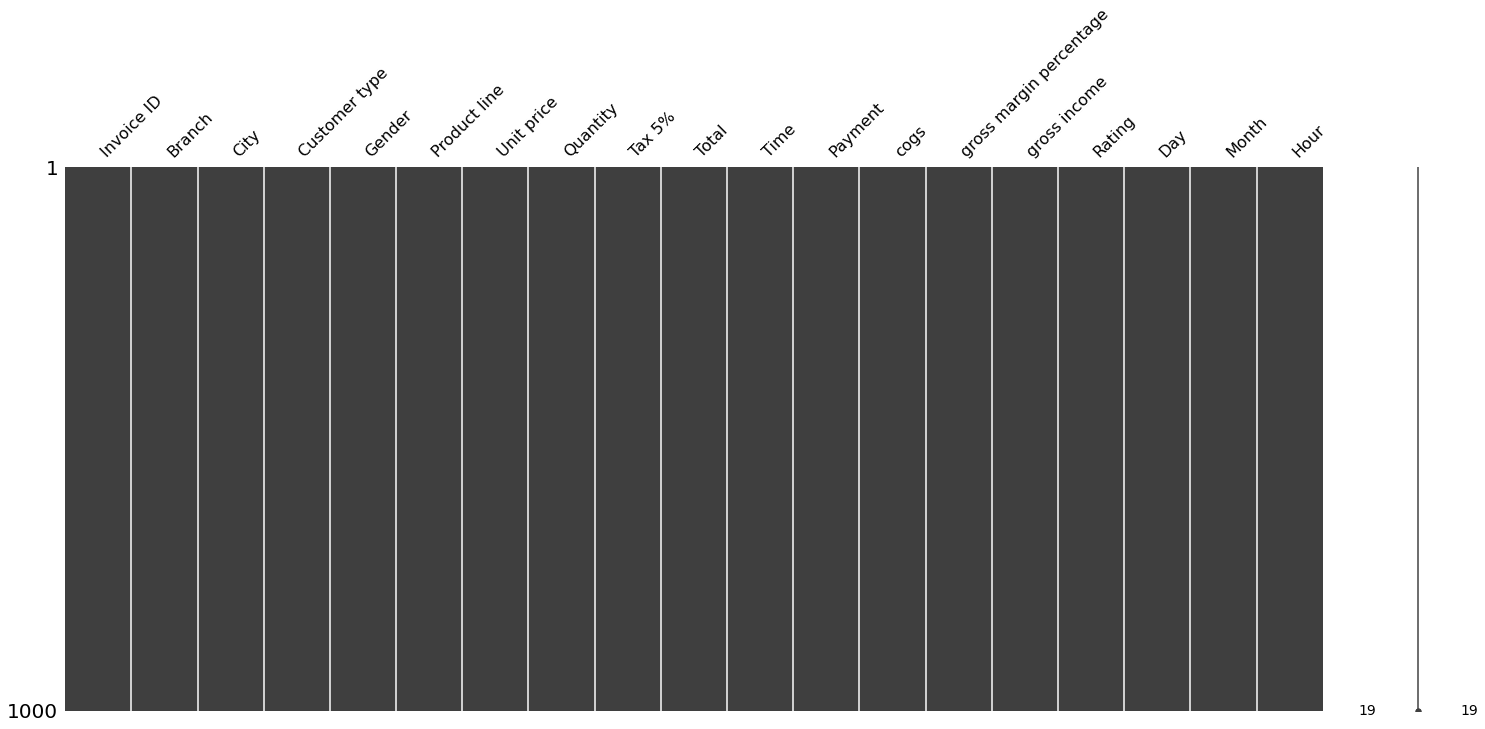

In [12]:
#Visualize the nan values in each columns if any
msno.matrix(df);

There are no null values in the dataset

### EXPLORATORY DATA ANALYSIS

In [13]:
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [14]:
cities = pd.DataFrame({'city': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.8409,19.7633,21.9588],
                       'Longitude' : [96.1735, 96.0785, 96.0891]})

supermarket_loc = folium.Map(location = [21.9162,95.9560], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

plt.figure(figsize=(800,600));

for (i, j) in cities.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['city'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(supermarket_loc)

supermarket_loc

<Figure size 57600x43200 with 0 Axes>

####  Univariate Analysis

C:\Users\Paula_Besst\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


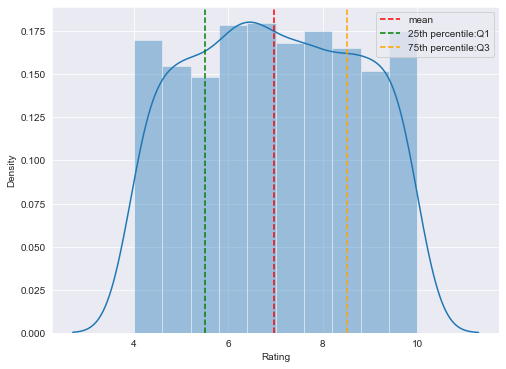

In [52]:
plt.figure(figsize=(8,6))
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

Observation: The rating distribution is uniform; no skewness to the left or right side of the distribution. The mean and percentiles of the rating were also plotted. This showed a mean rating of 7 across all products.

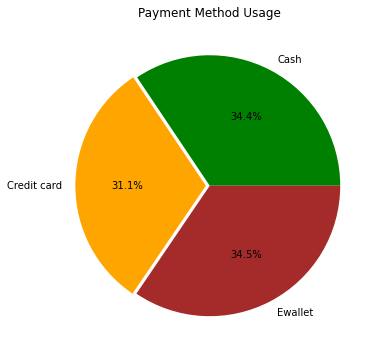

In [19]:
method=df.groupby('Payment').count()['Customer type']
payment=['Cash','Credit card','Ewallet']
c=['green','orange','brown']

#Plot the pie chart
plt.figure(figsize=(8,6))
plt.pie(method,colors=c,labels=payment,explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('Payment Method Usage')
plt.show()

Observation: The most used payment method is Ewallet.

####  Bivariate Analysis 

###### SALES

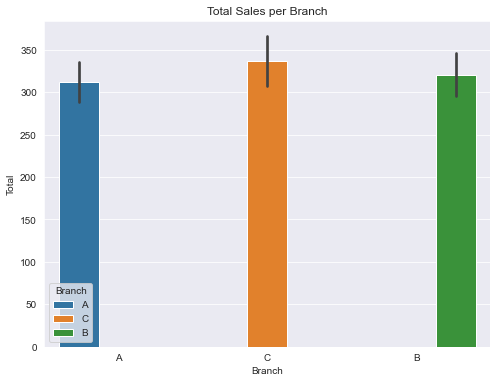

In [49]:
df.groupby('Branch').count()
plt.figure(figsize=(8,6))
plt.title('Total Sales per Branch')
sns.barplot(x='Branch',y='Total',data=df,hue='Branch');


Observation: Branch C has the highest sales. However, the difference in sales across the three branches is not much.

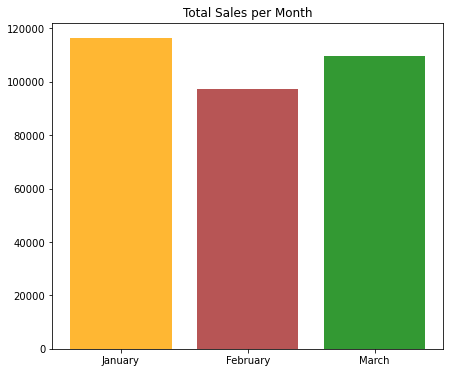

In [26]:
sale=df.groupby('Month').sum()['Total']
month=['January','February','March']
c=['orange','brown','green']
#Plot
plt.figure(figsize=(7,6))
plt.bar(month,sale,color=c,alpha=.8)
plt.title('Total Sales per Month')
plt.show()

1. January recorded sales of approximately 117,000.00, indicating a strong start for the year.
2. February had a reduction in sales to about 97,000.00; showing a dip in revenue as compared to January.
3. March rebounded with an approximate sales of 112,000.00, suggesting a promising recovery.


###### GROSS INCOME

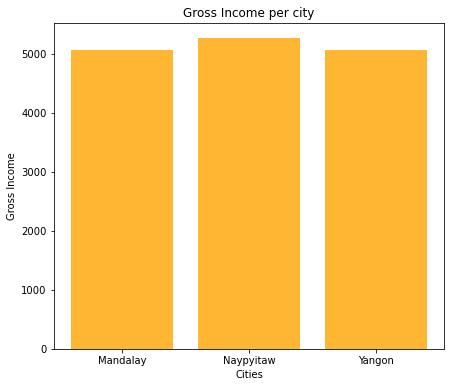

In [22]:
income=df.groupby('City').sum()['gross income']
cities=[city for city, df in df.groupby('City')] 
#Plot
plt.figure(figsize=(7,6))
plt.bar(cities,income,color='orange',alpha=.8)
plt.xlabel('Cities')
plt.ylabel('Gross Income')
plt.title('Gross Income per city')
plt.show()


Observation: There is not much difference in gross income by branches at an average level. Branch C has a slightly higher income than A or B, As observed earlier, though branch A has slightly higher sales than the rest C is the most profitable branch in terms of gross income.

###### QUANTITY OF PRODUCTS


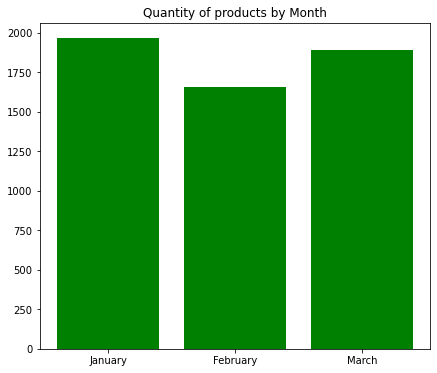

In [23]:
quantity=df.groupby('Month').sum()['Quantity']
#Plot
plt.figure(figsize=(7,6))
plt.title('Quantity of products by Month')
plt.bar(month,quantity,color='green')
plt.show()

Observation: The quantity graph follows a similar pattern to the Sale graph. We have a correlation between the number of products and the number of items sold.

###### RATING ON BRANCHES


C:\Users\Paula_Besst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


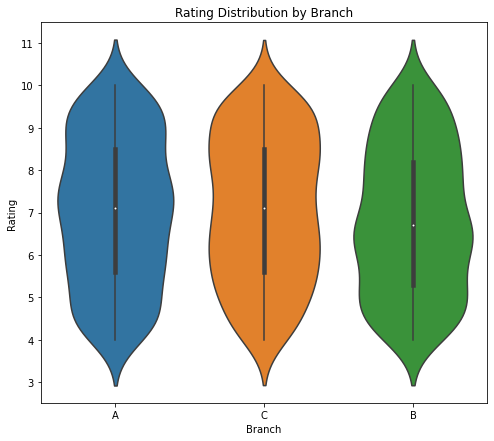

In [24]:
plt.figure(figsize=(8,7))
plt.title('Rating Distribution by Branch')
sns.violinplot('Branch','Rating',data=df);

Observation:

1. Branch A received the most positive rating given the tapered shape at the middle between values 6 and 9.
2. Branch C recorded almost equal number of positive and negative ratings between 4 to 6 and 8 to 10.
3. Branch B had the most negative rating due to the tapered shape between values 4 and 6.


### CORRELATION ANALYSIS 

###### Pairwise correlations

In [27]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month,Hour
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,-0.03,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.01,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.02,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.02,-0.00
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.02,-0.00
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.02,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.04,-0.03
Month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,1.00,0.04
Hour,0.01,-0.01,-0.00,-0.00,-0.00,NaN,-0.00,-0.03,0.04,1.00


###### Visualized correlations

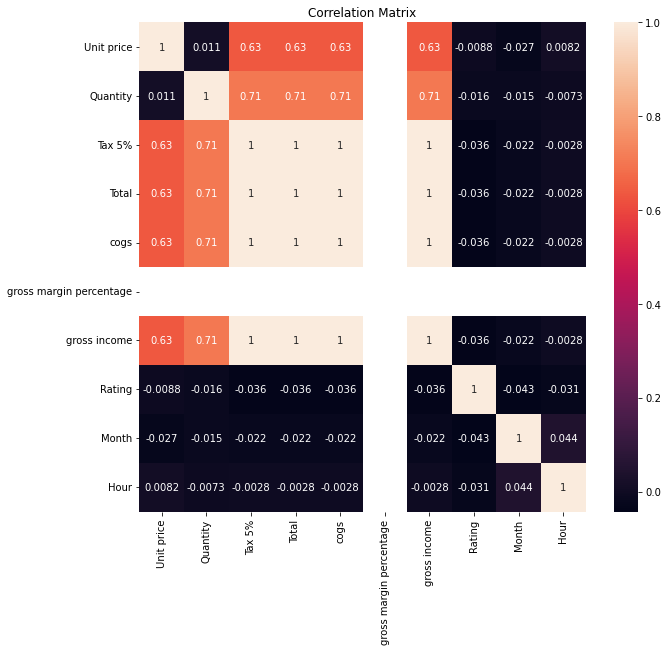

In [28]:
#Create a correlation matrix
corr_df=df.corr()
#Plot 
plt.figure(figsize=(10,9))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()



1. The black blocks represent almost no correlation between values in the columns.
2. The orange blocks represent a positive correlation between values. Unit price is highly correlated to cogs with 0.63 correlation. Quantity also has a higher correlation of 0.70 with Gross income.
3. The pale blocks indicate perfect correlation between values of the same columns.
4. The white bars also indicate null values (gross margin percentage vs gross margin percentage).


### QUESTIONS FOR FURTHER ANALYSIS
1. What was the total amount of sales?
2. What branch has the highest sales?
3. What type of product is sold the most?
4. Which day of the week has the maximum sales?
5. What time is best to display an advertisement to maximize the revenue?
6. Which product line should the supermarket focus on?
7. Which city should be chosen for expansion and which products should it focus on?


**Q1.What was the total amount of sales?**

In [29]:
total_sale=df['Total'].sum()
print('The total sales of the supermarket is ${:.2f}'.format(total_sale))

The total sales of the supermarket is $322966.75


 **Q2.What branch has the highest sales?**

In [30]:
sale_branch=df.groupby('Branch').sum()['Total']
print('Branch C has the highest number of sale of ${:.2f}'.format(max(sale_branch)))

Branch C has the highest number of sale of $110568.71


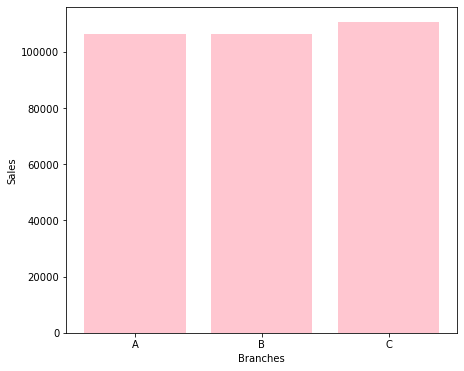

In [31]:
branches = [branch for branch, df in df.groupby('Branch')]
#Plot
plt.figure(figsize=(7,6))
plt.bar(branches,sale_branch,alpha=0.9,color='pink')
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.show()

**Q3.What type of product is sold the most?**

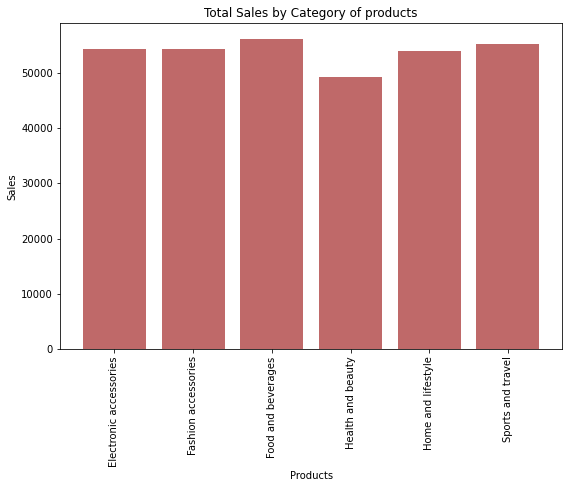

In [34]:
sale_product=df.groupby('Product line').sum()['Total']
products =[product for product, df in df.groupby('Product line')]
#Plot
plt.figure(figsize=(9,6))
plt.bar(products,sale_product,alpha=.7,color='brown')
plt.xticks(products, rotation='vertical')
plt.title('Total Sales by Category of products')
plt.xlabel('Products')
plt.ylabel('Sales')

plt.show()

Food and Beverages are the most sold products among all branches

**Q4.Which day of the week has maximum sales?**

C:\Users\Paula_Besst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Daily Sales by Day of the Week'}, xlabel='Day', ylabel='count'>

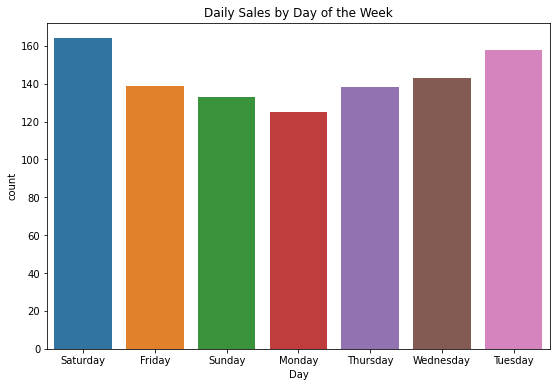

In [35]:
plt.figure(figsize=(9,6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['Day'])

Sales go up Saturdays and peak again in the middle of the week across all branches.

**Q5.What time is best to display an advertisement to maximize the revenue?**

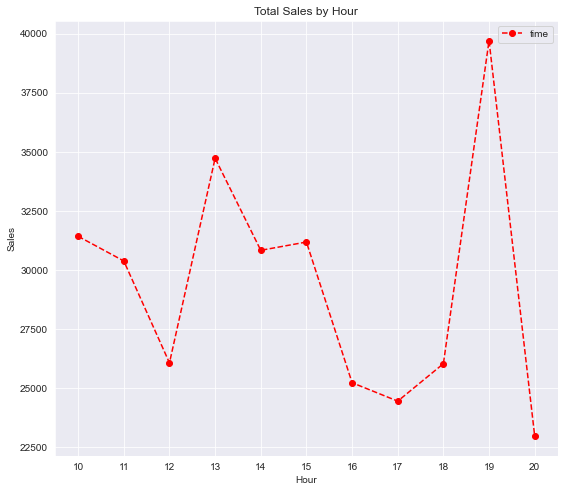

In [48]:
sale=df.groupby('Hour').sum()['Total']
hours=[hour for hour, df in df.groupby('Hour')]

sns.set_style('darkgrid')
plt.figure(figsize=(9,8))
plt.plot(hours,sale,'o--r')
plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Sales')
plt.title('Total Sales by Hour')
plt.legend(['time'])
plt.show()

Observation: The Normal customers and the members like to shop around noon but members have the highest number of transactions at 2 pm. Around 4 pm and 9 pm, the normal customers shop the most.

**Q6.Which product line should the supermarket focus on?**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

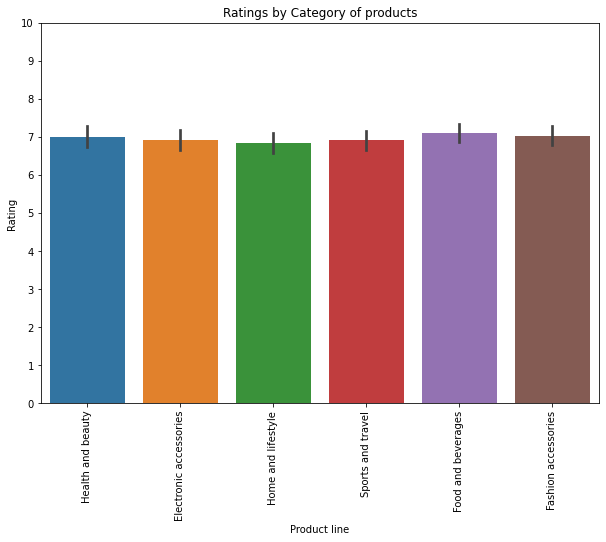

In [38]:
ydata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (10,7))
sns.barplot(y = df['Rating'], x = df['Product line'])
plt.title('Ratings by Category of products')
plt.yticks(ydata)
plt.xticks( rotation='vertical')

Food and beverages have a higher rating from customers than other categories. We observed earlier that this same category makes the most sales. Hence should be focused on more.

**Q7.Which city should be chosen for expansion and which products should it focus on?**

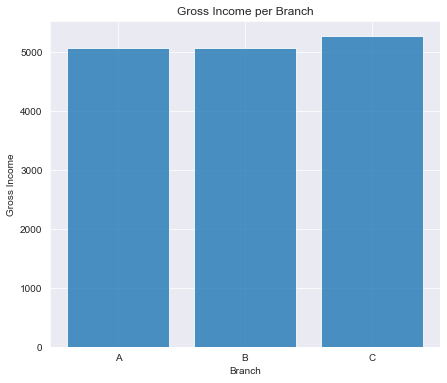

In [50]:
income=df.groupby('Branch').sum()['gross income']
cities=[city for city, df in df.groupby('Branch')] 
#Plot
sns.set_style('darkgrid')
plt.figure(figsize=(7,6))
plt.bar(cities,income,alpha=.8)
plt.xlabel('Branch')
plt.ylabel('Gross Income')
plt.title('Gross Income per Branch')
plt.show()

It is obvious that Naypyitaw branch produces more profit, hence the expansion plan should be based on this city.

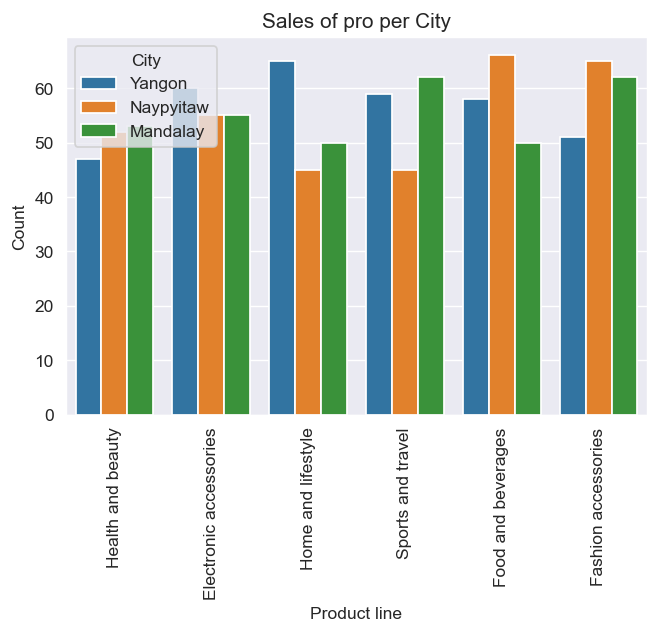

In [41]:
plt.figure(dpi=125)
sns.countplot(x='Product line', hue="City", data=df) 
plt.ylabel('Count')
plt.title('Sales of pro per City')
plt.xticks( rotation='vertical')

plt.show()

Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.

### SUMMARY AND CONCLUSION


In this analysis, we have looked at significant aspects of supermarkets sales, uncovering insights that can inform future decisions. Here is a summary of a few of them:

•	Branch C, located in Naypyitaw, stands out as the leader in sales.

•	The food and beverage category produces the highest number of sales.

•	E-wallet is the favorite payment method among customers.

•	The best time to display product advertisement is before 2pm and 7pm.

•	The positive customer rating; with an average of 7/10, suggests that the supermarket offers a good shopping experience.

